In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Load libraries
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns

In [3]:
# Load CSV using Pandas
filename = 'vehicle.csv'
#names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df_1 = pd.read_csv(filename, sep=',')
print(df_1.shape)

(846, 19)


In [4]:
df_1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [5]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
df = df_1.copy()

In [7]:
print(df.head())

   compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0            

In [8]:
# descriptions
print(df.describe(include='all').transpose())

                            count unique  top freq     mean      std  min  \
compactness                   846    NaN  NaN  NaN  93.6785  8.23447   73   
circularity                   841    NaN  NaN  NaN  44.8288  6.15217   33   
distance_circularity          842    NaN  NaN  NaN  82.1105  15.7783   40   
radius_ratio                  840    NaN  NaN  NaN  168.888  33.5202  104   
pr.axis_aspect_ratio          844    NaN  NaN  NaN  61.6789  7.89146   47   
max.length_aspect_ratio       846    NaN  NaN  NaN  8.56738  4.60122    2   
scatter_ratio                 845    NaN  NaN  NaN  168.902  33.2148  112   
elongatedness                 845    NaN  NaN  NaN  40.9337  7.81619   26   
pr.axis_rectangularity        843    NaN  NaN  NaN  20.5824  2.59293   17   
max.length_rectangularity     846    NaN  NaN  NaN  147.999  14.5157  118   
scaled_variance               843    NaN  NaN  NaN  188.631   31.411  130   
scaled_variance.1             844    NaN  NaN  NaN  439.494  176.667  184   

In [9]:
# status distribution
print(df.groupby('class').size())

class
bus    218
car    429
van    199
dtype: int64


  class  count      prop
0   car    429  0.507092
1   bus    218  0.257683
2   van    199  0.235225


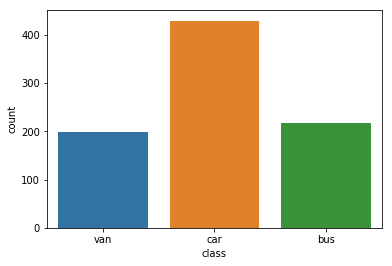

In [10]:
## Target Variable Frequency Distribution
freq = df['class'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
print (freq)
import seaborn as sns
sns.countplot(df['class'])
plt.show()

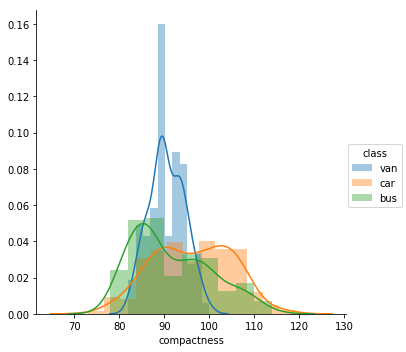

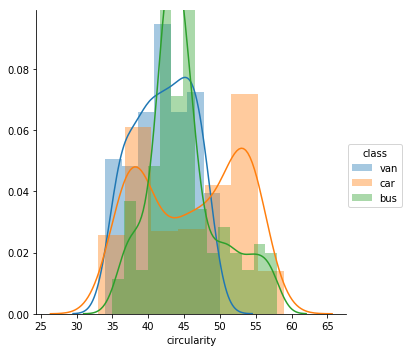

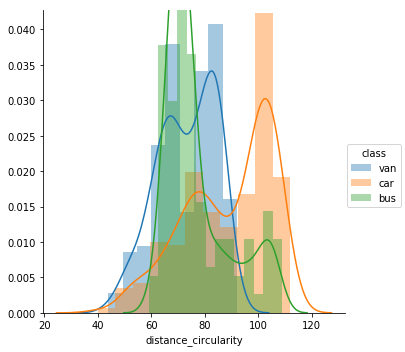

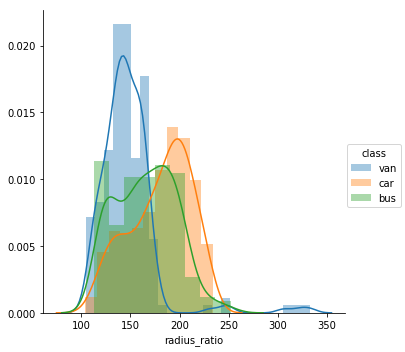

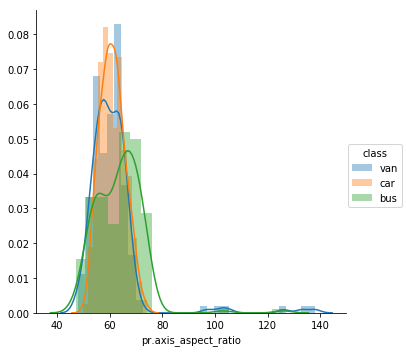

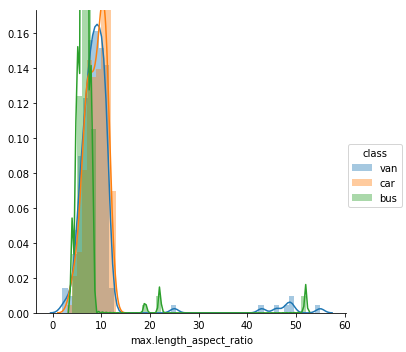

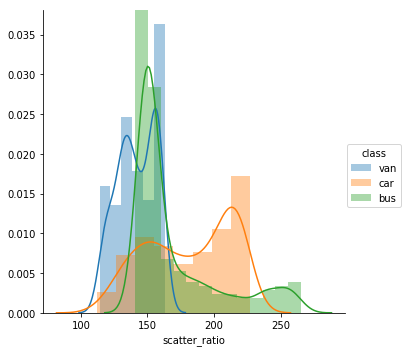

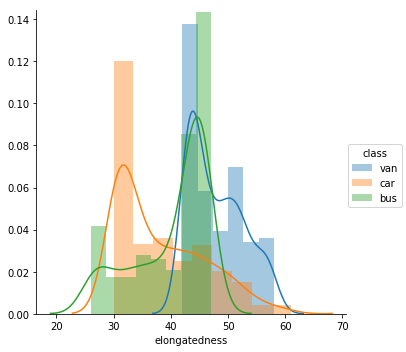

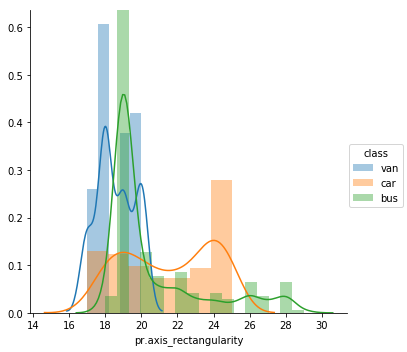

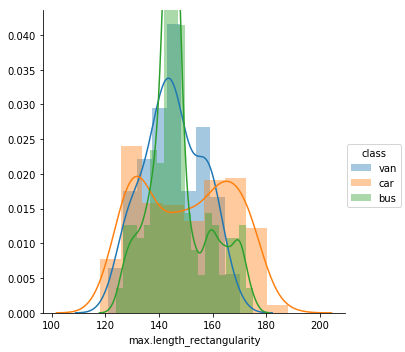

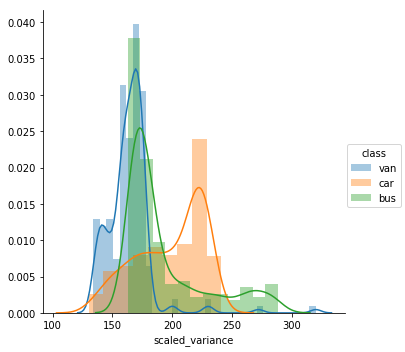

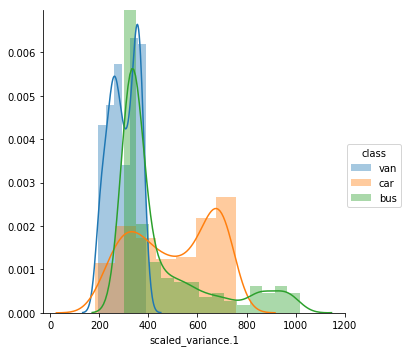

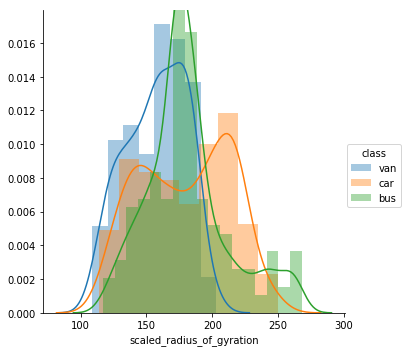

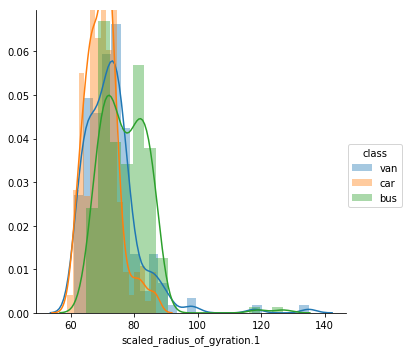

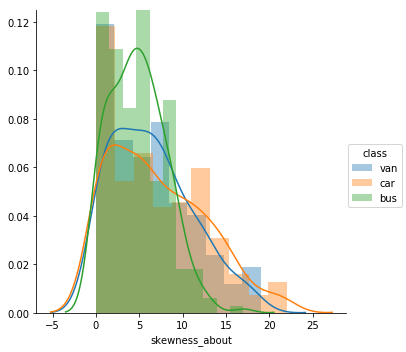

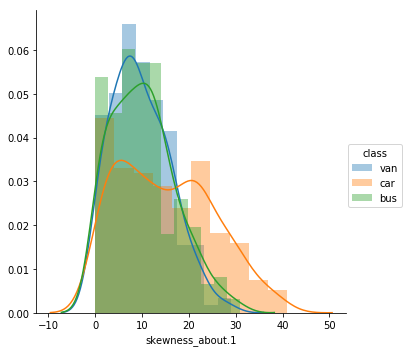

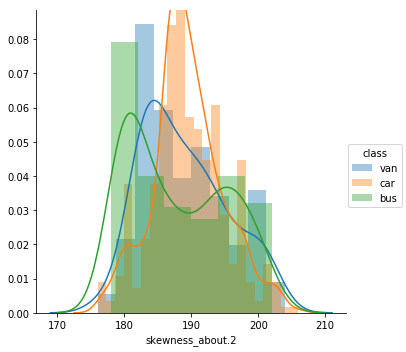

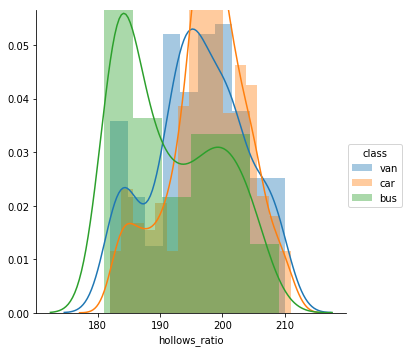

TypeError: can't multiply sequence by non-int of type 'float'

In [11]:
import warnings
warnings.filterwarnings('ignore')
for col in df.columns:
    if(col == 'name'):
        continue
    sns.FacetGrid(df, hue='class', size =5).map(sns.distplot, col).add_legend()
    plt.show()

In [12]:
# Convert Class Veriable Object to Numeric

df['class'] = pd.factorize(df['class'])[0]# status distribution

In [13]:
print(df.groupby('class').size())
#df['class']

class
0    199
1    429
2    218
dtype: int64


In [14]:
labels, uniques = pd.factorize(['car', 'van', 'bus', 'van', 'bus'])

In [15]:
labels

array([0, 1, 2, 1, 2], dtype=int64)

In [16]:
uniques

array(['car', 'van', 'bus'], dtype=object)

In [17]:
# find missing value is any
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [18]:
import numpy as np
df['circularity'] = df['circularity'].replace(np.NaN, df['circularity'].median())

In [19]:
df['distance_circularity'] = df['distance_circularity'].replace(np.NaN, df['distance_circularity'].median())
df['radius_ratio'] = df['radius_ratio'].replace(np.NaN, df['radius_ratio'].median())
df['pr.axis_aspect_ratio'] = df['pr.axis_aspect_ratio'].replace(np.NaN, df['pr.axis_aspect_ratio'].median())
df['scatter_ratio'] = df['distance_circularity'].replace(np.NaN, df['distance_circularity'].median())
df['elongatedness'] = df['elongatedness'].replace(np.NaN, df['elongatedness'].median())
df['pr.axis_rectangularity'] = df['pr.axis_rectangularity'].replace(np.NaN, df['pr.axis_rectangularity'].median())
df['scaled_variance'] = df['scaled_variance'].replace(np.NaN, df['scaled_variance'].median())
df['scaled_variance.1'] = df['scaled_variance.1'].replace(np.NaN, df['scaled_variance.1'].median())
df['scaled_radius_of_gyration'] = df['scaled_radius_of_gyration'].replace(np.NaN, df['scaled_radius_of_gyration'].median())
df['scaled_radius_of_gyration.1'] = df['scaled_radius_of_gyration.1'].replace(np.NaN, df['scaled_radius_of_gyration.1'].median())
df['skewness_about'] = df['skewness_about'].replace(np.NaN, df['skewness_about'].median())
df['skewness_about.1'] = df['skewness_about.1'].replace(np.NaN, df['skewness_about.1'].median())
df['skewness_about.2'] = df['skewness_about.2'].replace(np.NaN, df['skewness_about.2'].median())

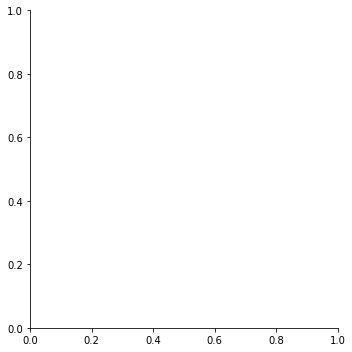

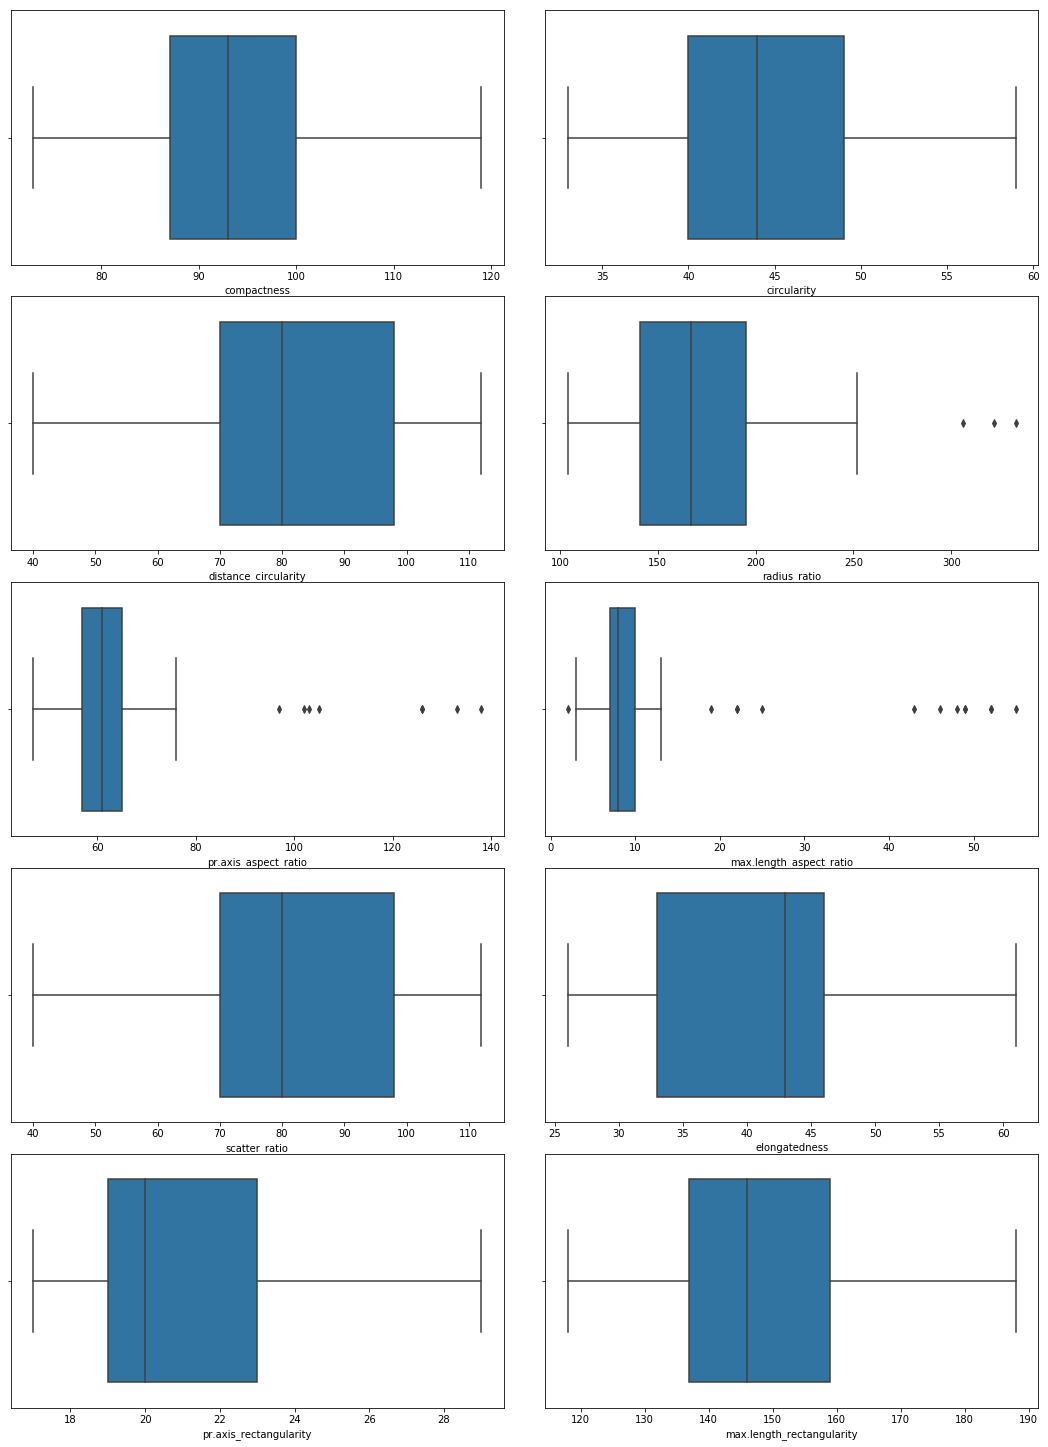

In [20]:
import matplotlib.pyplot as plt
df1 = df.select_dtypes([np.int64, np.float64])
f, axes = plt.subplots(nrows=5,ncols=2,figsize=(15,20))
f.tight_layout()
for ax, col in zip(axes.flatten(),df1.columns):
   sns.boxplot(df1[col],ax=ax)
plt.show()

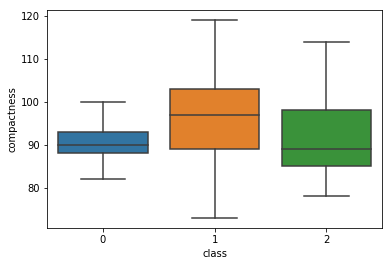

In [21]:
ax = sns.boxplot(x="class", y="compactness", data=df)
plt.show()

In [22]:
# Find Outliar 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   28.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [23]:
HH = (Q3 + 1.5 * IQR)
#HH['Marginal Adhesion']
HH

compactness                    119.500
circularity                     62.500
distance_circularity           140.000
radius_ratio                   276.000
pr.axis_aspect_ratio            77.000
max.length_aspect_ratio         14.500
scatter_ratio                  140.000
elongatedness                   65.500
pr.axis_rectangularity          29.000
max.length_rectangularity      192.000
scaled_variance                292.000
scaled_variance.1              989.500
scaled_radius_of_gyration      271.500
scaled_radius_of_gyration.1     87.000
skewness_about                  19.500
skewness_about.1                40.000
skewness_about.2               206.500
hollows_ratio                  217.125
class                            3.500
dtype: float64

#### Compare above Q3 Limit values with box plot and find exactly in which column we have to give outliar treatment

In [24]:
# Example :
# look at the box plot for radius_ratio Where exactly 3 dots are higlited,
#Where as we also detected 3 points using IQR now we have exact value to be replace with outliar
sum(df["radius_ratio"] > 276)

3

In [25]:
df['radius_ratio'].unique()

array([ 178.,  141.,  209.,  159.,  205.,  172.,  173.,  157.,  140.,
        167.,  143.,  136.,  171.,  144.,  203.,  201.,  109.,  197.,
        186.,  215.,  153.,  121.,  148.,  219.,  154.,  119.,  193.,
        129.,  160.,  151.,  222.,  177.,  118.,  306.,  176.,  169.,
        214.,  105.,  137.,  183.,  220.,  145.,  133.,  122.,  147.,
        115.,  174.,  228.,  175.,  185.,  195.,  221.,  212.,  135.,
        120.,  156.,  125.,  164.,  161.,  227.,  191.,  111.,  170.,
        113.,  127.,  188.,  180.,  116.,  158.,  162.,  211.,  152.,
        124.,  252.,  150.,  130.,  198.,  202.,  199.,  128.,  142.,
        163.,  155.,  184.,  165.,  322.,  194.,  218.,  216.,  223.,
        149.,  131.,  139.,  179.,  166.,  187.,  231.,  168.,  126.,
        206.,  210.,  110.,  189.,  134.,  132.,  230.,  196.,  208.,
        138.,  200.,  225.,  246.,  207.,  192.,  117.,  123.,  146.,
        190.,  182.,  204.,  224.,  333.,  213.,  226.,  238.,  181.,
        114.,  104.,

In [26]:
df.loc[df['radius_ratio'] > 276, 'radius_ratio'] = np.nan
df['radius_ratio'].fillna(276,inplace=True)

In [27]:
df.loc[df['pr.axis_aspect_ratio'] > 77, 'pr.axis_aspect_ratio'] = np.nan
df['pr.axis_aspect_ratio'].fillna(77,inplace=True)

In [28]:
df.loc[df['max.length_aspect_ratio'] > 14.5, 'max.length_aspect_ratio'] = np.nan
df['max.length_aspect_ratio'].fillna(14.5,inplace=True)

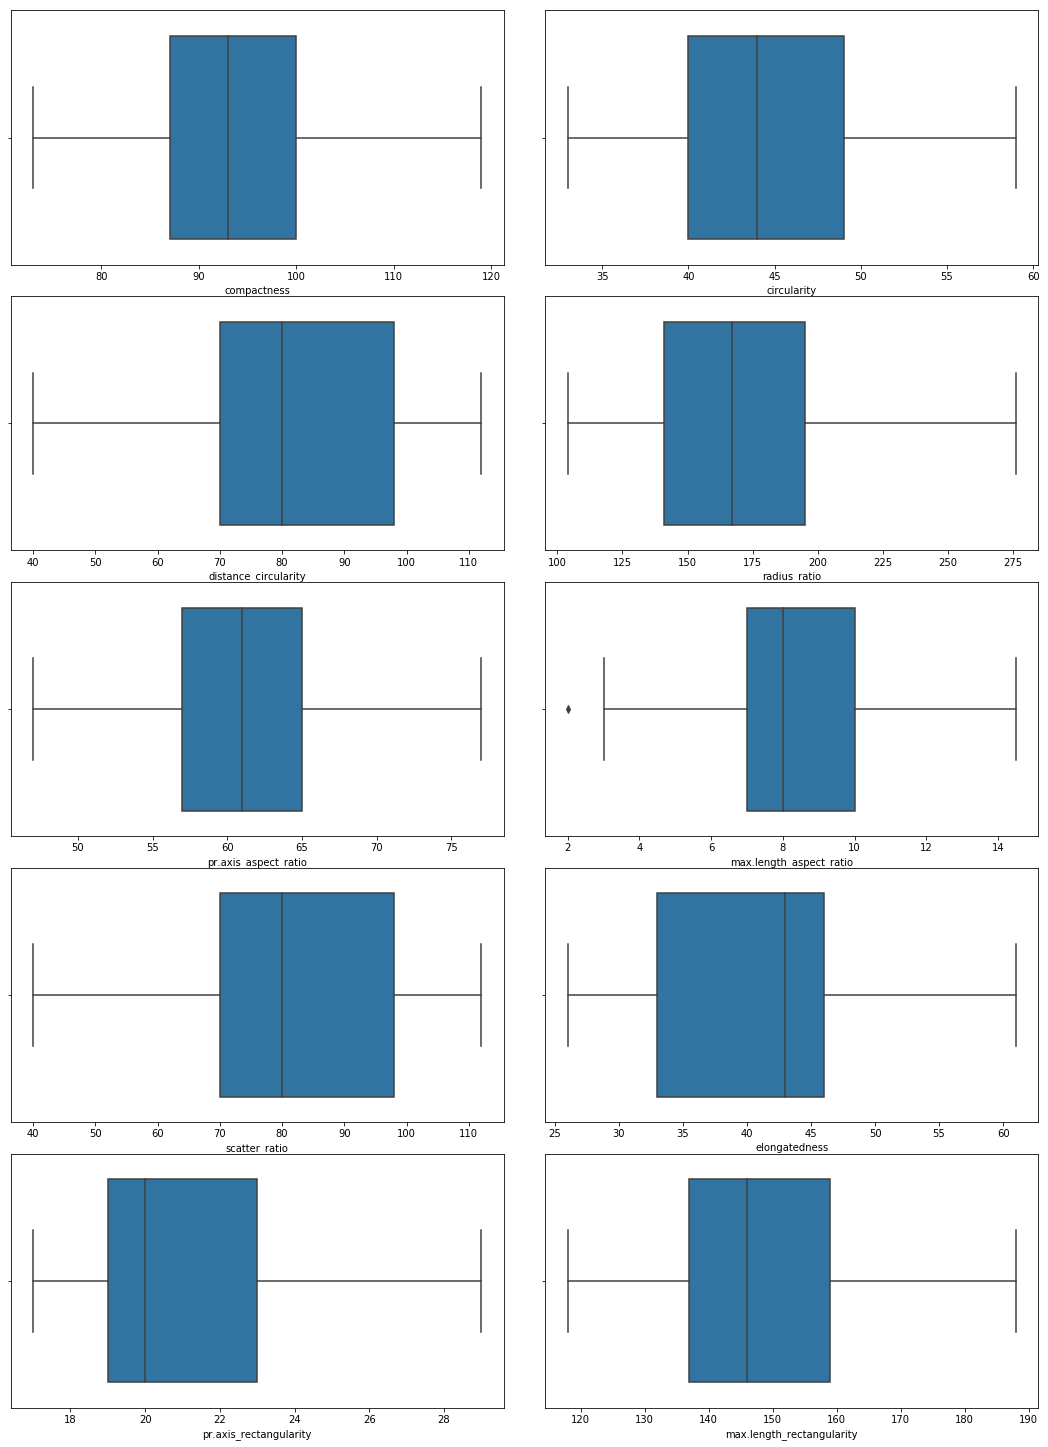

In [160]:
import matplotlib.pyplot as plt
df1 = df.select_dtypes([np.int64, np.float64])
f, axes = plt.subplots(nrows=5,ncols=2,figsize=(15,20))
f.tight_layout()
for ax, col in zip(axes.flatten(),df1.columns):
   sns.boxplot(df1[col],ax=ax)
plt.show()

#### Q2:
Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
X_train_sd = StandardScaler().fit_transform(df)

In [31]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.70501074  0.16710246  0.43778271
   0.79086299 -0.78968322  0.81465658  0.67694334  0.76297234  0.81497566
   0.58593517 -0.24988794  0.23635777  0.15720044  0.29889034  0.36598446
   0.03383559]
 [ 0.68569786  1.00118343  0.79325751  0.63155955  0.19810417  0.52464253
   0.79325751 -0.82244387  0.84439802  0.96245572  0.79724837  0.83693508
   0.92691166  0.05200785  0.14436828 -0.01145212 -0.10455005  0.04640562
   0.15909793]
 [ 0.79086299  0.79325751  1.00118343  0.78177016  0.22876451  0.61208824
   1.00118343 -0.9123854   0.89408198  0.77544391  0.86253904  0.88706577
   0.70660663 -0.22621115  0.1140589   0.26586088  0.14627113  0.33312625
   0.06454368]
 [ 0.70501074  0.63155955  0.78177016  1.00118343  0.68167801  0.4983775
   0.78177016 -0.80682172  0.72497311  0.57712074  0.7957668   0.73521253
   0.54550889 -0.21337556  0.0508907   0.17752563  0.39225435  0.48132073
   0.192863  ]
 [ 0.16710246  0.19810417  0.22

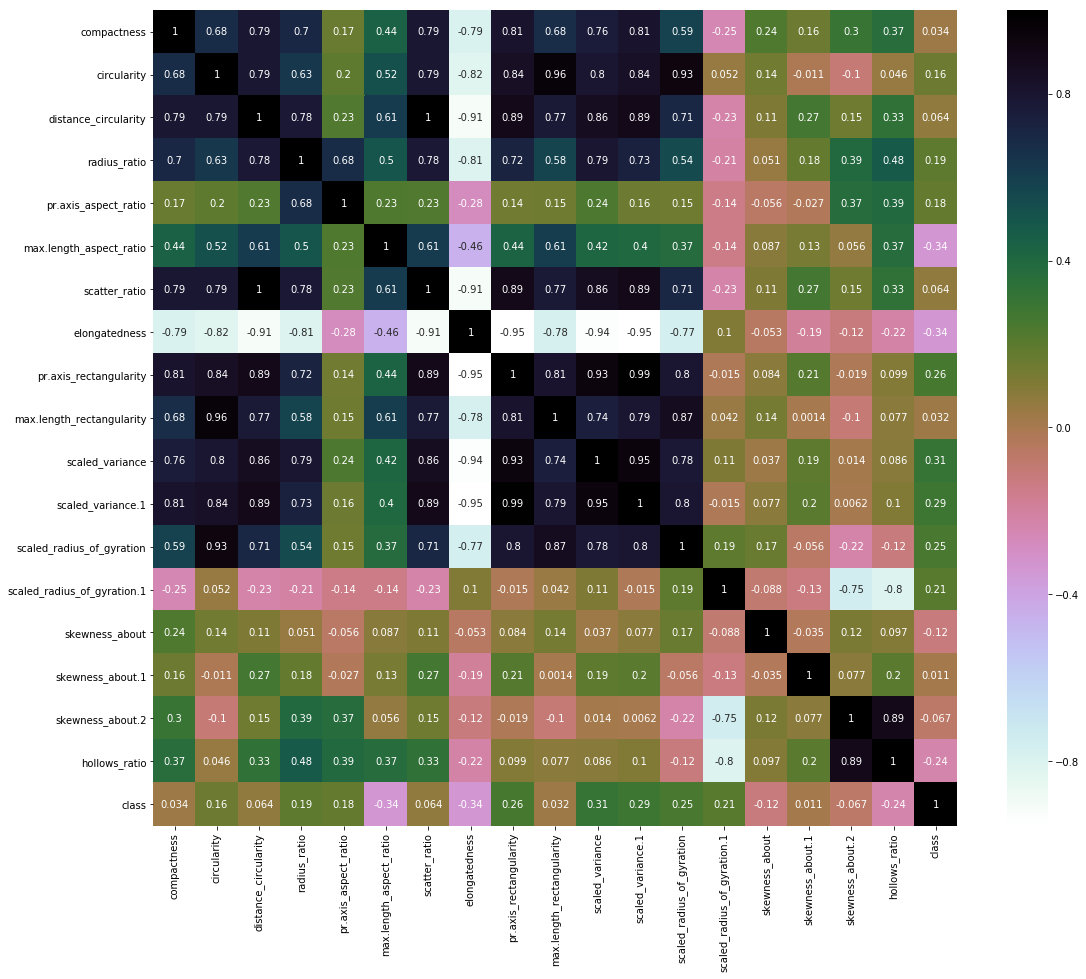

In [32]:
plt.figure(figsize=(18,15)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(Parkinson_diseases
plt.show()

In [33]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# For each Column, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["features"] = df.columns
vif["VIF Factor"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

In [34]:
vif

,features,VIF Factor
0,compactness,7.031207e+02
1,circularity,1.704234e+03
2,distance_circularity,inf
3,radius_ratio,5.416555e+02
4,pr.axis_aspect_ratio,6.344797e+02
5,max.length_aspect_ratio,6.489999e+01
6,scatter_ratio,inf
7,elongatedness,6.261575e+02
8,pr.axis_rectangularity,2.605144e+03
9,max.length_rectangularity,2.372030e+03


In [36]:
#Lets check VIF With another method

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    return X.iloc[:, variables]

In [38]:
calculate_vif_(df, thresh=5.0)

dropping 'distance_circularity' at index: 2
dropping 'skewness_about.2' at index: 15
dropping 'pr.axis_rectangularity' at index: 7
dropping 'max.length_rectangularity' at index: 7
dropping 'hollows_ratio' at index: 13
dropping 'scaled_variance' at index: 7
dropping 'circularity' at index: 1
dropping 'pr.axis_aspect_ratio' at index: 2
dropping 'compactness' at index: 0
dropping 'scatter_ratio' at index: 2
dropping 'scaled_radius_of_gyration.1' at index: 5
dropping 'scaled_radius_of_gyration' at index: 4
dropping 'radius_ratio' at index: 0
dropping 'max.length_aspect_ratio' at index: 0
dropping 'scaled_variance.1' at index: 1
Remaining variables:
Index(['elongatedness', 'skewness_about', 'skewness_about.1', 'class'], dtype='object')


,elongatedness,skewness_about,skewness_about.1,class
0,42.0,6.0,16.0,0
1,45.0,9.0,14.0,0
2,32.0,14.0,9.0,1
3,46.0,6.0,10.0,0
4,45.0,9.0,11.0,2
5,26.0,5.0,9.0,2
6,42.0,13.0,1.0,2
7,48.0,3.0,3.0,0
8,54.0,2.0,14.0,0
9,36.0,4.0,14.0,1


In [39]:
#Use PCA For Dimention Reduction 

In [161]:
X = df.iloc[:,0:18].values
y = df.iloc[:,18].values
from sklearn.preprocessing import StandardScaler

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [163]:
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [164]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00148148  0.69100362  0.79310322  0.69291747  0.16205288  0.45037097
   0.79310322 -0.78475977  0.81329758  0.6899308   0.75194485  0.81109949
   0.59127062 -0.25706575  0.24454027  0.16596838  0.30573255  0.37699504]
 [ 0.69100362  1.00148148  0.78957672  0.64125202  0.22103196  0.51607565
   0.78957672 -0.8210884   0.84106246  0.96297089  0.79414478  0.83491474
   0.92494693  0.04135158  0.14623341  0.00478583 -0.08196764  0.06721806]
 [ 0.79310322  0.78957672  1.00148148  0.77619777  0.227323    0.61210279
   1.00148148 -0.91102111  0.89432078  0.77825555  0.85690105  0.88659908
   0.70505227 -0.22551163  0.11753794  0.27980837  0.15590587  0.34427571]
 [ 0.69291747  0.64125202  0.77619777  1.00148148  0.68581488  0.5281606
   0.77619777 -0.80162908  0.72199204  0.59617103  0.79721967  0.7305536
   0.55366186 -0.17990536  0.04516284  0.18450122  0.38552774  0.48399429]
 [ 0.16205288  0.22103196  0.227323    0.68581488  1.00148148  0.26557709
   0.227323   

#### Identify eigen values and eigen vector

In [165]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ -2.73008422e-01  -8.73092818e-02   1.80643615e-01   1.05473722e-01
    1.35974432e-01  -4.51964991e-02   3.26914877e-01   4.20647152e-01
    6.50743969e-01   3.06322117e-01  -1.52006700e-01  -7.42473988e-02
    8.16683955e-02  -1.23867090e-01   4.63031172e-03   3.78786695e-02
   -1.86776206e-02   3.55818189e-16]
 [ -2.87017168e-01   1.45081216e-01  -6.42038016e-02   1.80330364e-01
   -2.30684828e-02   1.34434746e-01  -3.67167419e-01   1.97259732e-01
   -1.32108332e-02  -2.57789867e-03   1.44866207e-01   2.73953689e-01
    4.14180623e-02  -2.68654491e-01  -5.88705164e-02   4.27408730e-02
    7.01571110e-01  -2.17942626e-15]
 [ -3.06328178e-01  -4.03709504e-02   1.08300610e-01  -7.68460801e-02
   -5.21008021e-02   7.96406829e-02   6.48645518e-02  -3.41334496e-01
   -1.00521172e-01   4.42578049e-01   1.98356818e-01  -6.33386622e-02
   -2.56900504e-03   6.01156532e-02   1.08884922e-02  -5.21858837e-02
    3.64094108e-02  -7.07106781e-01]
 [ -2.70565474e-01  -1.66136393e-01

#### Find variance and cumulative variance by each eigen vector

In [166]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  53.61425149   70.61963148   77.63602202   84.13600977   88.77679527
   93.1480306    95.33376375   96.88171608   97.95468772   98.54450623
   98.99337152   99.27407944   99.52818141   99.71293118   99.83367056
   99.94258671  100.          100.        ]


#### Use PCA command from sklearn and find Principal Components. Transform data to components formed

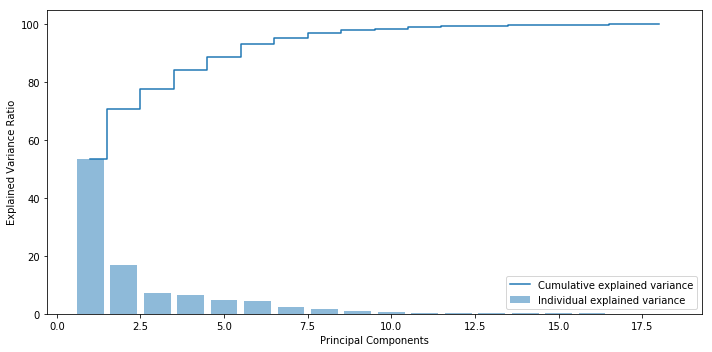

In [167]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [168]:
from sklearn import datasets
from sklearn.decomposition import PCA
X_reduced = pd.DataFrame(data = PCA(n_components=6).fit_transform(df))

In [169]:
#X_reduced
X_reduced.head()

,0,1,2,3,4,5
0,-56.186156,10.468039,26.325862,-9.880825,1.656321,-6.697068
1,-114.109636,-6.909710,-3.736855,-12.269272,12.531005,5.999892
2,209.881335,7.404357,19.677750,-3.346856,1.215443,1.803956
3,-138.075512,24.820162,-20.152596,-18.226024,0.026969,9.922334
4,-96.815704,30.549922,61.229530,74.635474,29.211481,11.752434


#### Find correlation between components and features

In [170]:
X_reduced.corr()

,0,1,2,3,4,5
0,1.000000e+00,9.394289e-18,8.478557e-19,3.486678e-17,1.680494e-17,1.977618e-18
1,9.394289e-18,1.000000e+00,3.858084e-16,-1.643190e-17,-1.514296e-17,-4.503295e-17
2,8.478557e-19,3.858084e-16,1.000000e+00,1.040537e-16,4.761913e-17,-1.201794e-17
3,3.486678e-17,-1.643190e-17,1.040537e-16,1.000000e+00,-2.978701e-17,2.856265e-17
4,1.680494e-17,-1.514296e-17,4.761913e-17,-2.978701e-17,1.000000e+00,6.501882e-17
5,1.977618e-18,-4.503295e-17,-1.201794e-17,2.856265e-17,6.501882e-17,1.000000e+00


#### SVM

In [171]:
# use from sklearn.svm import SVC
from sklearn import svm
clf = svm.SVC() 

In [172]:
# your insights
clf.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [173]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.523529411765


#### observations : 
                The model works well in training however fails in production.
                Acuuracy score has significantly reduced to 52.3 % hence the model looks like overfitting

In [174]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,1
row_0,
0,37
1,89
2,44


#### Scale the data points using MinMaxScaler

In [175]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00148148  0.69100362  0.79310322  0.69291747  0.16205288  0.45037097
   0.79310322 -0.78475977  0.81329758  0.6899308   0.75194485  0.81109949
   0.59127062 -0.25706575  0.24454027  0.16596838  0.30573255  0.37699504]
 [ 0.69100362  1.00148148  0.78957672  0.64125202  0.22103196  0.51607565
   0.78957672 -0.8210884   0.84106246  0.96297089  0.79414478  0.83491474
   0.92494693  0.04135158  0.14623341  0.00478583 -0.08196764  0.06721806]
 [ 0.79310322  0.78957672  1.00148148  0.77619777  0.227323    0.61210279
   1.00148148 -0.91102111  0.89432078  0.77825555  0.85690105  0.88659908
   0.70505227 -0.22551163  0.11753794  0.27980837  0.15590587  0.34427571]
 [ 0.69291747  0.64125202  0.77619777  1.00148148  0.68581488  0.5281606
   0.77619777 -0.80162908  0.72199204  0.59617103  0.79721967  0.7305536
   0.55366186 -0.17990536  0.04516284  0.18450122  0.38552774  0.48399429]
 [ 0.16205288  0.22103196  0.227323    0.68581488  1.00148148  0.26557709
   0.227323   

In [176]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### Fit SVM Model on Scale data

In [177]:
clf.fit(X_train , y_train)
print("Training Score : ",clf.score(X_train_scaled, y_train))
print("Test Score scaled : ",clf.score(X_test_scaled, y_test))

print("Test Score : ",clf.score(X_test, y_test))

Training Score :  0.502958579882
Test Score scaled :  0.523529411765
Test Score :  0.523529411765


#### we can try increasing either C or gamma to fit a more complex model.

#### Try improving the model accuracy using C=1000

In [178]:
clf_Imp = svm.SVC(C=1000)
clf_Imp.fit(X_train_scaled , y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [179]:
print("Training Score scaled : ",clf_Imp.score(X_train_scaled, y_train))
print("Test Score scaled: ",clf_Imp.score(X_test_scaled, y_test))

Training Score scaled :  0.995562130178
Test Score scaled:  0.894117647059


#### Comment
while trying to improve the performance of the model by changing the C value to 1000, 
I see that the model has improved and increase in the model accuracy has increased by 49%

##### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
Let's try to explore different Kernel and C (Bonus for practice)

In [180]:
import multiprocessing 
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [181]:
param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [182]:
gs = GridSearchCV(estimator=clf_Imp, param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [183]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [184]:
gs.best_estimator_

SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [185]:
gs.best_score_ 

0.9275147928994083

#### Comment
We have seen, SVC Working very good at C = 1000, But there is a big gap between Training results and testig results.
This is just becous all veriable which we used to see the results are not so relevent to predict taget.
Thus we try to remove and add some veriable to se if our model accuracy get incress or not 

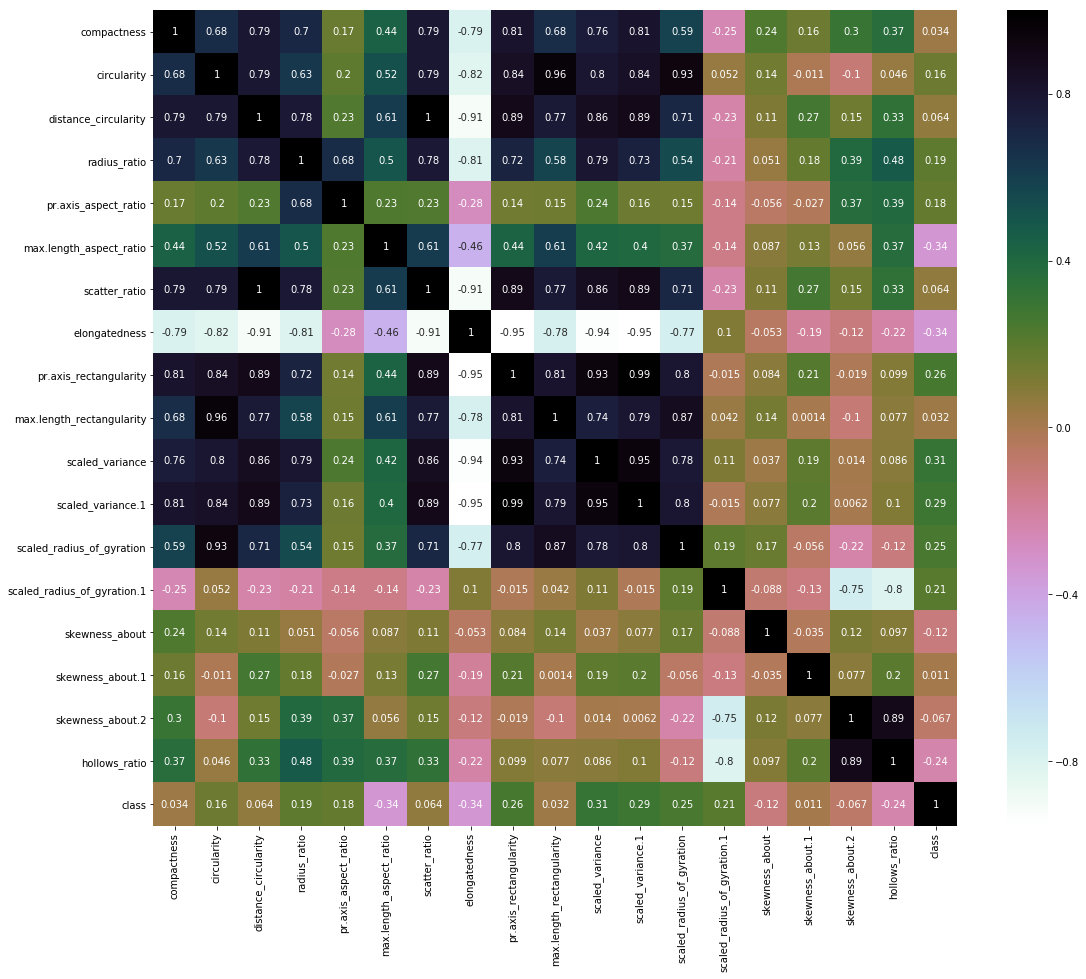

In [186]:
plt.figure(figsize=(18,15)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(Parkinson_diseases
plt.show()

In [187]:
df_2 = df.copy()

In [188]:
df_2 = df[["elongatedness","skewness_about","skewness_about.2","class"]]

In [189]:
df_2.head()

,elongatedness,skewness_about,skewness_about.2,class
0,42.0,6.0,187.0,0
1,45.0,9.0,189.0,0
2,32.0,14.0,188.0,1
3,46.0,6.0,199.0,0
4,45.0,9.0,180.0,2


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null float64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio  

In [191]:
X = df_2.iloc[:,0:3].values
y = df_2.iloc[:,3].values

In [192]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [193]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00148148 -0.05865158 -0.11786501]
 [-0.05865158  1.00148148  0.10163313]
 [-0.11786501  0.10163313  1.00148148]]


In [194]:
#Identify eigen values and eigen vector

In [195]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[-0.5648738   0.62940882  0.53363108]
 [ 0.52277207  0.77331666 -0.35873489]
 [ 0.6384567  -0.07632748  0.76586367]]

Eigenvalues 
[ 1.1889802   0.94371313  0.87175111]


In [196]:
#Find variance and cumulative variance by each eigen vector

In [197]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [  39.57404525   70.98461553  100.        ]


In [198]:
#Use PCA command from sklearn and find Principal Components. Transform data to components formed

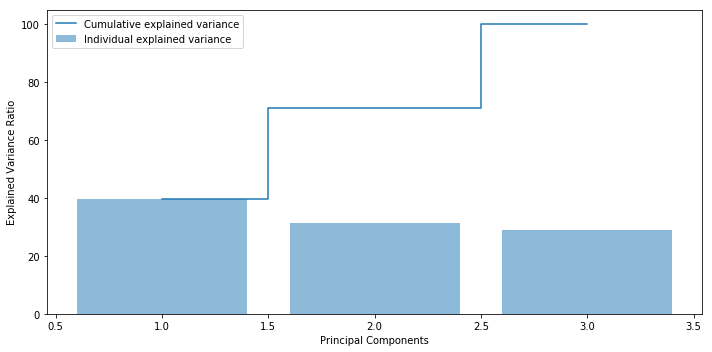

In [199]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [216]:
from sklearn import datasets
from sklearn.decomposition import PCA
X_reduced = pd.DataFrame(data = PCA(n_components=3).fit_transform(df))

In [217]:
#X_reduced
X_reduced.head()

,0,1,2
0,-56.186156,10.468039,26.325862
1,-114.109636,-6.909710,-3.736855
2,209.881335,7.404357,19.677750
3,-138.075512,24.820162,-20.152596
4,-96.815704,30.549922,61.229530


In [218]:
#Find correlation between components and features

In [219]:
X_reduced.corr()

,0,1,2
0,1.000000e+00,-1.033372e-17,-2.543567e-18
1,-1.033372e-17,1.000000e+00,-4.150730e-17
2,-2.543567e-18,-4.150730e-17,1.000000e+00


In [220]:
#SVM

In [221]:
# use from sklearn.svm import SVC
from sklearn import svm
clf = svm.SVC() 

In [222]:
# your insights
clf.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [223]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

0.92899408284
0.694117647059


#### observations :
            The model works well in training however fails in production.
            Acuuracy score has significantly reduced to 23.48 % hence the model looks like overfitting

In [224]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,0,1,2
row_0,,,
0,23,9,5
1,8,72,9
2,4,17,23


In [225]:
#Scale the data points using MinMaxScaler¶

In [226]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00148148 -0.05865158 -0.11786501]
 [-0.05865158  1.00148148  0.10163313]
 [-0.11786501  0.10163313  1.00148148]]


#### from sklearn.preprocessing import MinMaxScaler

In [227]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [228]:
#Fit SVM Model on Scale data

In [229]:
clf.fit(X_train , y_train)
print("Training Score : ",clf.score(X_train_scaled, y_train))
print("Test Score scaled : ",clf.score(X_test_scaled, y_test))

print("Test Score : ",clf.score(X_test, y_test))

Training Score :  0.502958579882
Test Score scaled :  0.523529411765
Test Score :  0.694117647059


#### Comment
we can try increasing either C or gamma to fit a more complex model.
Try improving the model accuracy using C=1000

In [230]:
clf_Imp = svm.SVC(C=1000)
clf_Imp.fit(X_train_scaled , y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [231]:
print("Training Score scaled : ",clf_Imp.score(X_train_scaled, y_train))
print("Test Score scaled: ",clf_Imp.score(X_test_scaled, y_test))

Training Score scaled :  0.699704142012
Test Score scaled:  0.652941176471


#### Comment
while trying to improve the performance of the model by changing the C value to 1000, I see that the model has improved and increase in the model accuracy.

In [232]:
import multiprocessing 
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [233]:
param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [234]:
gs = GridSearchCV(estimator=clf_Imp, param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [235]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [236]:
gs.best_estimator_

SVC(C=3.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [237]:
gs.best_score_

0.57396449704142016

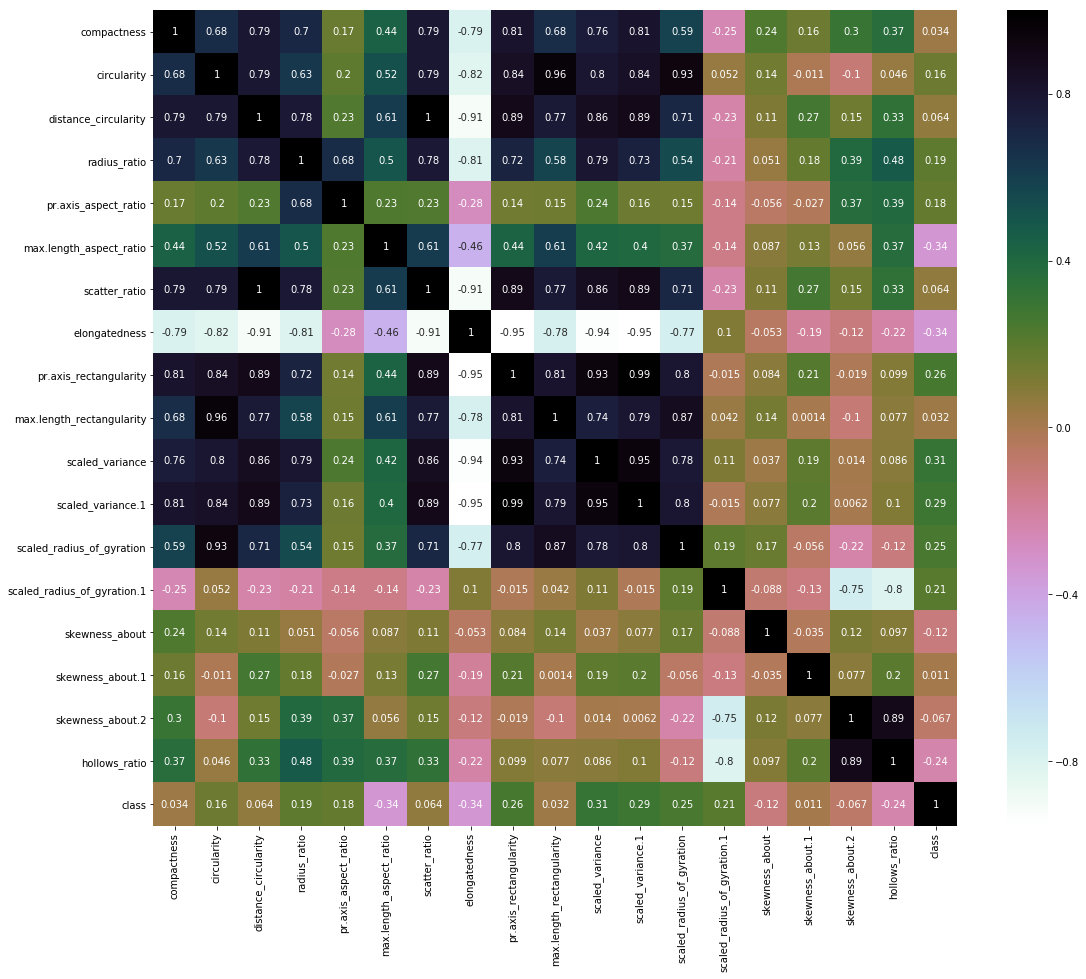

In [256]:
plt.figure(figsize=(18,15)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(Parkinson_diseases
plt.show()

In [257]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 10 columns):
circularity                  846 non-null float64
radius_ratio                 846 non-null float64
pr.axis_aspect_ratio         846 non-null float64
elongatedness                846 non-null float64
pr.axis_rectangularity       846 non-null float64
scaled_variance              846 non-null float64
scaled_radius_of_gyration    846 non-null float64
skewness_about               846 non-null float64
hollows_ratio                846 non-null int64
class                        846 non-null int64
dtypes: float64(8), int64(2)
memory usage: 66.2 KB


In [238]:
#Lets remove tis three veriable and find with rest now

In [310]:
df_2 = df.copy()

In [259]:
df_2 = df_2[["circularity","radius_ratio","pr.axis_aspect_ratio","elongatedness","pr.axis_rectangularity",
         "scaled_variance",
        "skewness_about","hollows_ratio","class"]]

In [311]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel


In [312]:
X = df_2.iloc[:,0:18].values
y = df_2.iloc[:,18].values
from sklearn.preprocessing import StandardScaler

In [313]:
X.shape

(846, 18)

In [314]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(846, 17)

In [320]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y, test_size = 0.2, random_state = 10)

In [321]:
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [322]:
cov_matrix = np.cov(X_train_sd.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00148148  0.79310322  0.69291747  0.16205288  0.45037097  0.79310322
  -0.78475977  0.81329758  0.6899308   0.75194485  0.81109949  0.59127062
  -0.25706575  0.24454027  0.16596838  0.30573255  0.37699504]
 [ 0.79310322  1.00148148  0.77619777  0.227323    0.61210279  1.00148148
  -0.91102111  0.89432078  0.77825555  0.85690105  0.88659908  0.70505227
  -0.22551163  0.11753794  0.27980837  0.15590587  0.34427571]
 [ 0.69291747  0.77619777  1.00148148  0.68581488  0.5281606   0.77619777
  -0.80162908  0.72199204  0.59617103  0.79721967  0.7305536   0.55366186
  -0.17990536  0.04516284  0.18450122  0.38552774  0.48399429]
 [ 0.16205288  0.227323    0.68581488  1.00148148  0.26557709  0.227323
  -0.27959831  0.14624829  0.17695652  0.24962801  0.16023216  0.16678136
  -0.10617112 -0.07209599 -0.03440973  0.36295469  0.39322517]
 [ 0.45037097  0.61210279  0.5281606   0.26557709  1.00148148  0.61210279
  -0.46058799  0.43714316  0.59598217  0.43679326  0.40410256 

In [323]:
#Identify eigen values and eigen vector

In [324]:
e_vals, e_vecs = np.linalg.eig(cov_matrix)
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Eigenvectors 
[[ -2.87102762e-01   6.88530257e-02  -1.85632555e-01   1.09907090e-01
   -1.30728713e-01   2.60962676e-02   4.26920533e-01  -3.17096692e-01
    6.47959723e-01   3.06064460e-01   1.48874419e-01   1.14480319e-01
    5.17314774e-02   1.12809282e-01   3.86397768e-02  -4.25222252e-03
   -2.70729951e-15]
 [ -3.21320862e-01   1.78827444e-02  -9.50645699e-02  -7.18893390e-02
    5.01046304e-02  -9.47364425e-02  -6.39255054e-02   3.34746657e-01
   -9.56416417e-02   4.42984629e-01  -1.96018091e-01   4.90533013e-02
   -1.29800883e-02  -7.18626067e-02  -5.39606352e-02  -1.20003745e-02
   -7.07106781e-01]
 [ -2.86595521e-01   1.48086318e-01   3.14809853e-01  -2.65951846e-02
    2.57132044e-02   2.31011995e-01   1.20828527e-01   9.73154074e-02
   -1.82584069e-02  -1.03435872e-02   1.84503706e-01  -6.88522651e-01
   -1.02457739e-01   2.67843390e-01  -3.47299011e-01  -8.13859952e-02
    6.88422180e-16]
 [ -1.09736352e-01   2.19374570e-01   6.80189583e-01   6.26886855e-02
    1.36055619e-

In [325]:
#Find variance and cumulative variance by each eigen vector

In [326]:
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 52.21956487  69.82288116  77.23035044  83.88393328  88.7955514
  93.33648394  95.35018819  96.86485113  98.00058064  98.62508965
  99.09025552  99.36921096  99.63728099  99.82343068  99.93879835 100.         100.        ]


In [327]:
#Use PCA command from sklearn and find Principal Components. Transform data to components formed¶

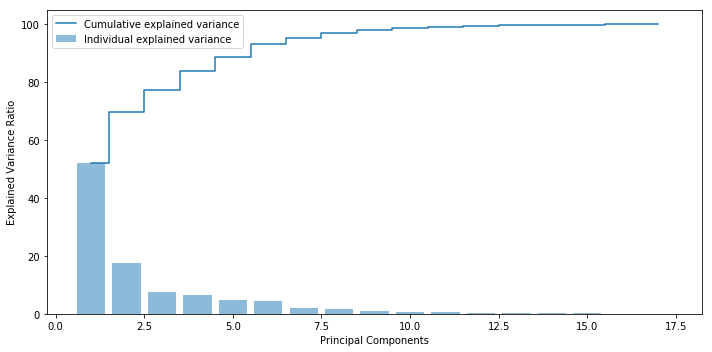

In [328]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [329]:
from sklearn import datasets
from sklearn.decomposition import PCA
X_reduced = pd.DataFrame(data = PCA(n_components=3).fit_transform(df))
#X_reduced
X_reduced.head()

,0,1,2
0,-56.186156,10.468039,26.325862
1,-114.109636,-6.909710,-3.736855
2,209.881335,7.404357,19.677750
3,-138.075512,24.820162,-20.152596
4,-96.815704,30.549922,61.229530


In [330]:
#Find correlation between components and features
X_reduced.corr()

,0,1,2
0,1.000000e+00,-2.583430e-18,-3.108804e-18
1,-2.583430e-18,1.000000e+00,1.145051e-16
2,-3.108804e-18,1.145051e-16,1.000000e+00


In [331]:
# SVm
# use from sklearn.svm import SVC
from sklearn import svm
clf = svm.SVC() 

In [332]:
# your insights
clf.fit(X_train , y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [333]:
print(clf.score(X_train,y_train))
print(clf.score(X_test, y_test))

1.0
0.523529411765


In [334]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test, y_pred)

col_0,1
row_0,
0,37
1,89
2,44


In [335]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_train_std =  sc.fit_transform(X_train)          
train_cov_matrix = np.cov(X_train_std.T)
print('Covariance Matrix \n%s', train_cov_matrix)

Covariance Matrix 
%s [[ 1.00148148  0.79310322  0.69291747  0.16205288  0.45037097  0.79310322
  -0.78475977  0.81329758  0.6899308   0.75194485  0.81109949  0.59127062
  -0.25706575  0.24454027  0.16596838  0.30573255  0.37699504]
 [ 0.79310322  1.00148148  0.77619777  0.227323    0.61210279  1.00148148
  -0.91102111  0.89432078  0.77825555  0.85690105  0.88659908  0.70505227
  -0.22551163  0.11753794  0.27980837  0.15590587  0.34427571]
 [ 0.69291747  0.77619777  1.00148148  0.68581488  0.5281606   0.77619777
  -0.80162908  0.72199204  0.59617103  0.79721967  0.7305536   0.55366186
  -0.17990536  0.04516284  0.18450122  0.38552774  0.48399429]
 [ 0.16205288  0.227323    0.68581488  1.00148148  0.26557709  0.227323
  -0.27959831  0.14624829  0.17695652  0.24962801  0.16023216  0.16678136
  -0.10617112 -0.07209599 -0.03440973  0.36295469  0.39322517]
 [ 0.45037097  0.61210279  0.5281606   0.26557709  1.00148148  0.61210279
  -0.46058799  0.43714316  0.59598217  0.43679326  0.40410256 

In [336]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [337]:
clf.fit(X_train , y_train)
print("Training Score : ",clf.score(X_train_scaled, y_train))
print("Test Score scaled : ",clf.score(X_test_scaled, y_test))

print("Test Score : ",clf.score(X_test, y_test))

Training Score :  0.502958579882
Test Score scaled :  0.523529411765
Test Score :  0.523529411765


In [338]:
clf_Imp = svm.SVC(C=1000)
clf_Imp.fit(X_train_scaled , y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [339]:
print("Training Score scaled : ",clf_Imp.score(X_train_scaled, y_train))
print("Test Score scaled: ",clf_Imp.score(X_test_scaled, y_test))

Training Score scaled :  0.995562130178
Test Score scaled:  0.894117647059


In [340]:
import multiprocessing 
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [341]:
param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [342]:
gs = GridSearchCV(estimator=clf_Imp, param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [343]:
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [344]:
gs.best_estimator_

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [345]:
gs.best_score_ 

0.9275147928994083